###Data Mining - Lab 07 -  Feature Scaling and Regression
Nguyễn Đức Vũ Duy - 18110004

Sau khi làm lại bài trên thì áp dụng kết hợp các bước ở trên để thực hiện tương tự giải bài toán Classification  tốt nhất cho dữ liệu sau “bank-full.csv”. Cần dự đoán cột “y - has the client subscribed a term deposit? (binary: 'yes','no')”.

In [1]:
# Data Manipulation 
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# Feature Selection and Encoding
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning 
import sklearn.ensemble as ske
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

#math
import math

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

# Plot the Figures Inline
%matplotlib inline

# Import library for spliting training and testing data
from sklearn.model_selection import train_test_split

In [2]:
#Import dataset
path='https://raw.githubusercontent.com/duynguyenhcmus/Repository/main/HocKy_2/KhaiThacDuLieu/bank-full.csv'
df=pd.read_csv(path,sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
#Data info
df.info()
#45211 rows with no null values. Got 7 int64 feautures and 10 object features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
#Describe dataset
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
df.describe(include=['O'])
#Most of poutcome feature values is unknown. So we should delete this column

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [6]:
df=df.drop(['poutcome'],axis=1)
df.head()
#We can notice that contact got unknow values

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,no


In [7]:
df.contact.value_counts()
#there is a lot of unknown values in contact feature. So we should delete this column also

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [8]:
# Delete contact feature
df=df.drop(['contact'],axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,0,no


In [9]:
#Check for null values
df.isnull().sum()*100/df.shape[0]
#No null values

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
y            0.0
dtype: float64

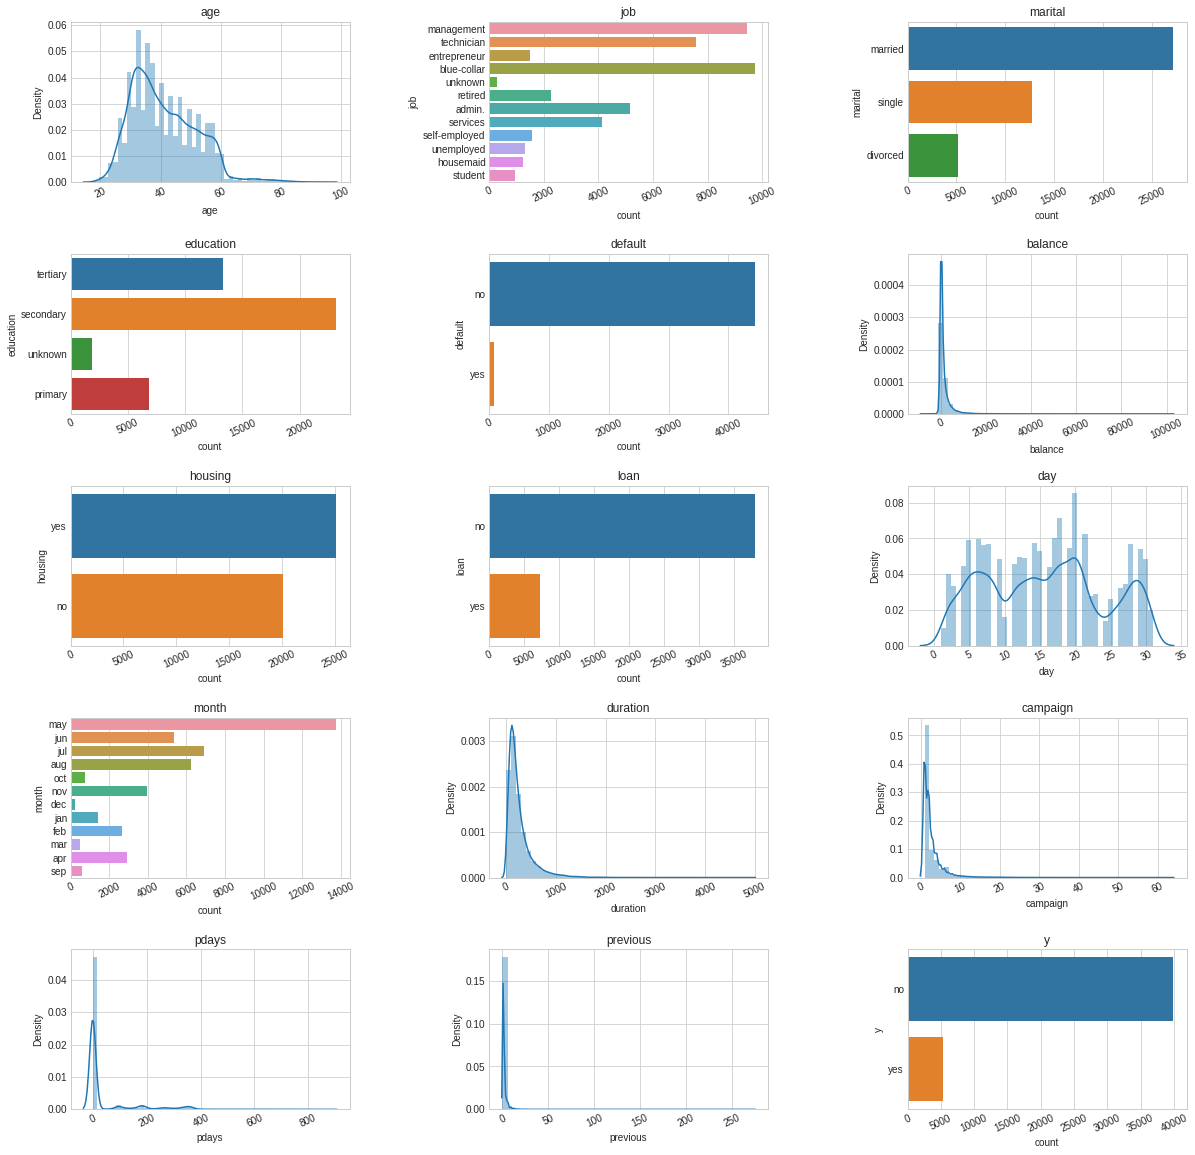

In [10]:
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(df, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)
#As we can see, education got a few row which is unknow. We should remove it.
#Balance, duration, pdays, previous got a skewed normal distribution. There are a lot of outlier here.
#This is an imbalanced data

In [11]:
#Handle unknown values
df['education']=df['education'].replace('unknown',np.nan)
df=df.dropna()

In [12]:
#Map target features with 1 and 0
df['y']=df['y'].map({'yes':1,'no':0})
df['y'].value_counts()

0    38317
1     5037
Name: y, dtype: int64

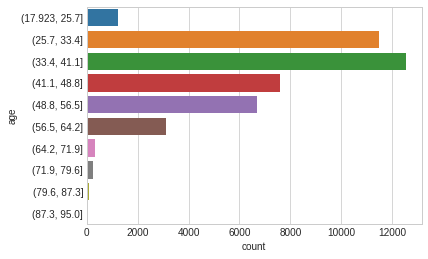

In [13]:
#Age
df['age'] = pd.cut(df['age'], 10)
sns.countplot(data=df,y='age')

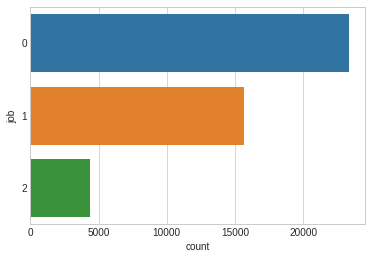

In [14]:
#Job features
#Normal job
df.loc[df['job']=='blue-collar','job']=0
df.loc[df['job']=='technician','job']=0
df.loc[df['job']=='services','job']=0
df.loc[df['job']=='self-employed','job']=0
df.loc[df['job']=='housemaid','job']=0

#Management jobs
df.loc[df['job']=='entrepreneur','job']=1
df.loc[df['job']=='admin.','job']=1
df.loc[df['job']=='management','job']=1

#No jobs
df.loc[df['job']=='retired','job']=2
df.loc[df['job']=='unemployed','job']=2
df.loc[df['job']=='student','job']=2
df.loc[df['job']=='unknown','job']=2

sns.countplot(data=df, y='job')

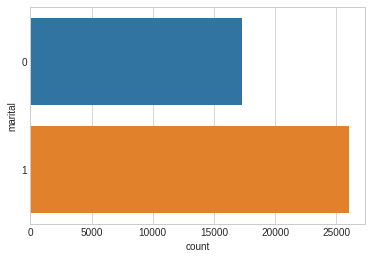

In [15]:
#marital
#Married at the moment
df.loc[df['marital']=='married','marital']=1

#Not married at the moment
df.loc[df['marital']=='single','marital']=0
df.loc[df['marital']=='divorced','marital']=0

sns.countplot(data=df,y='marital')

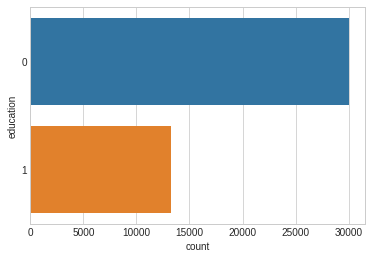

In [16]:
#education
#Above high school education
df.loc[df['education']=='tertiary','education']=1

#Below hign school education
df.loc[df['education']=='primary','education']=0
df.loc[df['education']=='secondary','education']=0

sns.countplot(data=df,y='education')

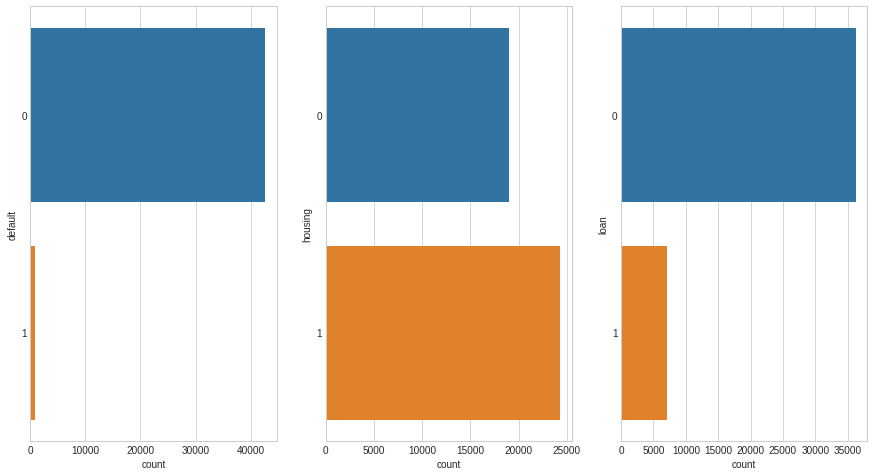

In [17]:
#default
df.loc[df['default']=='yes','default']=1
df.loc[df['default']=='no','default']=0

#housing
df.loc[df['housing']=='yes','housing']=1
df.loc[df['housing']=='no','housing']=0

#loan
df.loc[df['loan']=='yes','loan']=1
df.loc[df['loan']=='no','loan']=0

fig, (ax1, ax2, ax3)=plt.subplots(1,3,figsize=(15,8))
sns.countplot(data=df,y='default',ax=ax1)
sns.countplot(data=df,y='housing',ax=ax2)
sns.countplot(data=df,y='loan',ax=ax3)

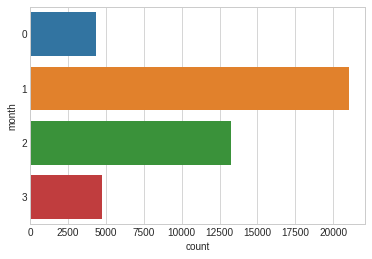

In [18]:
#Month features

#Divide into 4 quarters
#First quarter
df.loc[df['month']=='jan','month']=0
df.loc[df['month']=='feb','month']=0
df.loc[df['month']=='mar','month']=0

#Second quarter
df.loc[df['month']=='apr','month']=1
df.loc[df['month']=='may','month']=1
df.loc[df['month']=='jun','month']=1

#Third quarter
df.loc[df['month']=='jul','month']=2
df.loc[df['month']=='aug','month']=2
df.loc[df['month']=='sep','month']=2

#Fourth quarter
df.loc[df['month']=='oct','month']=3
df.loc[df['month']=='nov','month']=3
df.loc[df['month']=='dec','month']=3

sns.countplot(data=df,y='month')

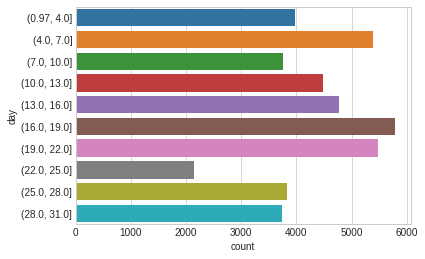

In [19]:
#cut into 10 parts to classify
df['day'] = pd.cut(df['day'], 10) 
sns.countplot(data=df,y='day')

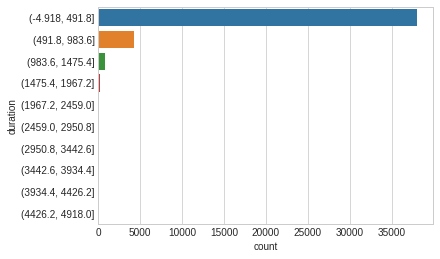

In [20]:
#cut into 10 parts
df['duration'] = pd.cut(df['duration'], 10)
sns.countplot(data=df,y='duration')

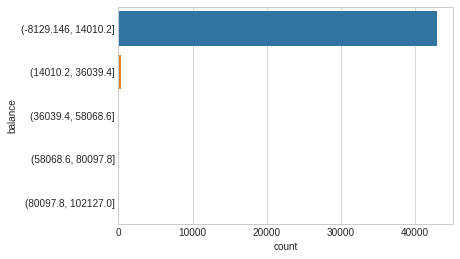

In [21]:
#cut into 5 parts
df['balance'] = pd.cut(df['balance'], 5)
sns.countplot(data=df,y='balance')

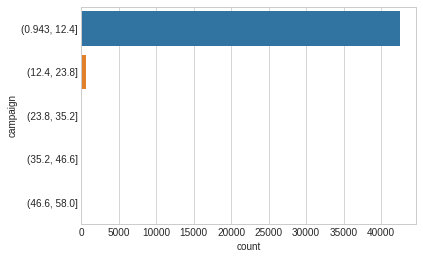

In [22]:
#Cut into 5 parts
df['campaign'] = pd.cut(df['campaign'], 5)
sns.countplot(data=df,y='campaign')

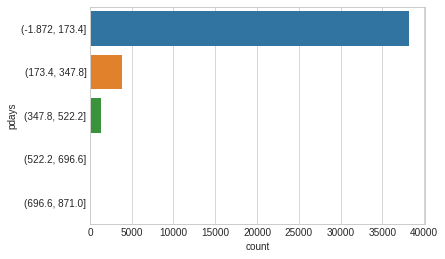

In [23]:
#cut into 5 parts
df['pdays'] = pd.cut(df['pdays'], 5)
sns.countplot(data=df,y='pdays')

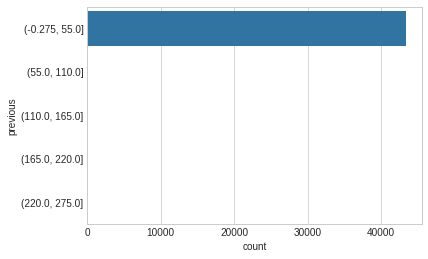

In [24]:
#cut into 5 parts
df['previous'] = pd.cut(df['previous'], 5) # discretised 
sns.countplot(data=df,y='previous')

In [25]:
#convert object handled features into int64-type feautures
df['month']=df['month'].astype(np.int64)
df['job']=df['job'].astype(np.int64)
df['marital']=df['marital'].astype(np.int64)
df['education']=df['education'].astype(np.int64)
df['default']=df['default'].astype(np.int64)
df['housing']=df['housing'].astype(np.int64)
df['loan']=df['loan'].astype(np.int64)

In [26]:
#Label encoding category features
label = LabelEncoder()
data_colums = df.dtypes.pipe(lambda X: X[X=='category']).index
for col in data_colums:
    df[col] = label.fit_transform(df[col])

df.info()
#Now all of the features are int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43354 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        43354 non-null  int64
 1   job        43354 non-null  int64
 2   marital    43354 non-null  int64
 3   education  43354 non-null  int64
 4   default    43354 non-null  int64
 5   balance    43354 non-null  int64
 6   housing    43354 non-null  int64
 7   loan       43354 non-null  int64
 8   day        43354 non-null  int64
 9   month      43354 non-null  int64
 10  duration   43354 non-null  int64
 11  campaign   43354 non-null  int64
 12  pdays      43354 non-null  int64
 13  previous   43354 non-null  int64
 14  y          43354 non-null  int64
dtypes: int64(15)
memory usage: 6.5 MB


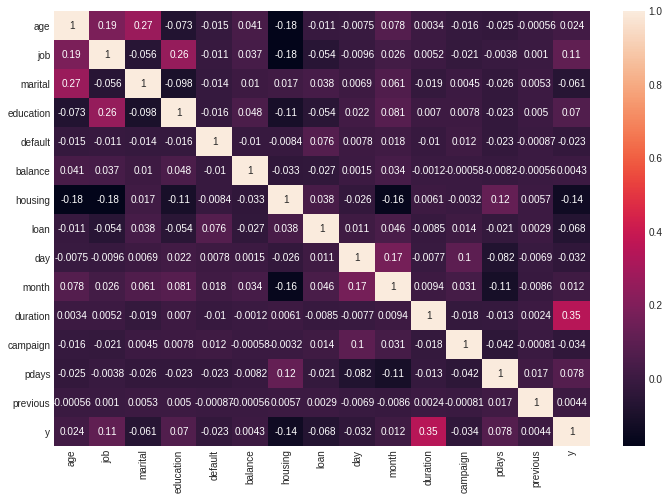

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot = True)
plt.show()
#most of features got low correlation with each others

In [28]:
#According to correlation map, we choose job, housing and durations as features for model
df_new=df.loc[:,['job','housing','duration','y']]
df_new.head()

,job,housing,duration,y
0,1,1,0,0
1,0,1,0,0
2,1,1,0,0
5,1,1,0,0
6,1,1,0,0


In [29]:
#Train test split data
X_train, X_test, y_train, y_test = train_test_split(df_new.iloc[:,:-1].copy(),df_new.iloc[:,-1].copy(),test_size=0.2,random_state=27)

In [30]:
#Function to fit algorithm
def fit_ml_algo(algo, X_train, y_train, X_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsClassifier, 
                          GaussianNB, 
                          DecisionTreeClassifier, 
                          RandomForestClassifier,
                          GradientBoostingClassifier))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2) 
    # CV 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs

In [31]:
# calculate the fpr and tpr for all thresholds of the classification
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

Accuracy: 88.89
Accuracy CV 10-Fold: 88.94
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7672
           1       0.56      0.17      0.26       999

    accuracy                           0.89      8671
   macro avg       0.73      0.58      0.60      8671
weighted avg       0.86      0.89      0.86      8671



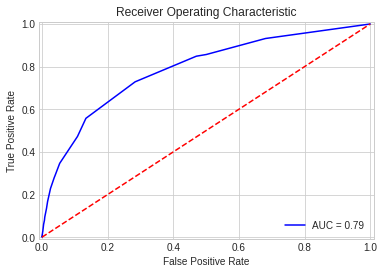

In [32]:
# Logistic Regression
train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log = fit_ml_algo(LogisticRegression(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)

print(metrics.classification_report(y_test, test_pred_log)) 

plot_roc_curve(y_test, probs_log)

Accuracy: 72.91
Accuracy CV 10-Fold: 82.11
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      7672
           1       0.17      0.34      0.22       999

    accuracy                           0.73      8671
   macro avg       0.53      0.56      0.53      8671
weighted avg       0.82      0.73      0.77      8671



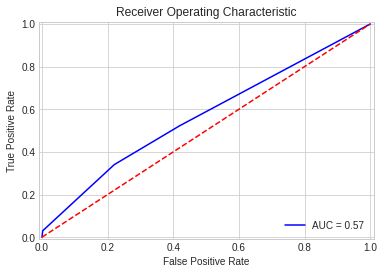

In [33]:
# k-Nearest Neighbors
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3,
                                                                                                 n_jobs = -1), 
                                                                                                 X_train, 
                                                                                                 y_train, 
                                                                                                 X_test, 
                                                                                                 10)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)

print(metrics.classification_report(y_test, test_pred_knn))

plot_roc_curve(y_test, probs_knn)

Accuracy: 88.29
Accuracy CV 10-Fold: 88.33
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      7672
           1       0.49      0.29      0.36       999

    accuracy                           0.88      8671
   macro avg       0.70      0.62      0.65      8671
weighted avg       0.86      0.88      0.87      8671



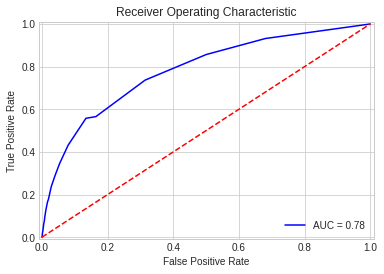

In [34]:
train_pred_gaussian, test_pred_gaussian, acc_gaussian, acc_cv_gaussian, probs_gau = fit_ml_algo(GaussianNB(), 
                                                                                     X_train, 
                                                                                     y_train, 
                                                                                     X_test, 
                                                                                     10)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)

print(metrics.classification_report(y_test, test_pred_gaussian)) 

plot_roc_curve(y_test, probs_gau)

Accuracy: 88.84
Accuracy CV 10-Fold: 88.91
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7672
           1       0.56      0.16      0.24       999

    accuracy                           0.89      8671
   macro avg       0.73      0.57      0.59      8671
weighted avg       0.86      0.89      0.86      8671



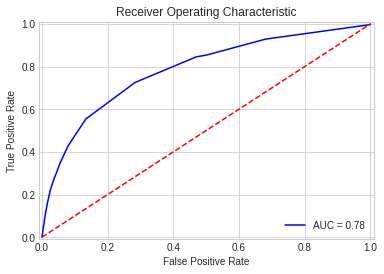

In [35]:
# Decision Tree Classifier
train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt, probs_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)

print(metrics.classification_report(y_test, test_pred_dt)) 

plot_roc_curve(y_test, probs_dt)

Accuracy: 88.85
Accuracy CV 10-Fold: 88.91
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7672
           1       0.56      0.16      0.25       999

    accuracy                           0.89      8671
   macro avg       0.73      0.57      0.59      8671
weighted avg       0.86      0.89      0.86      8671



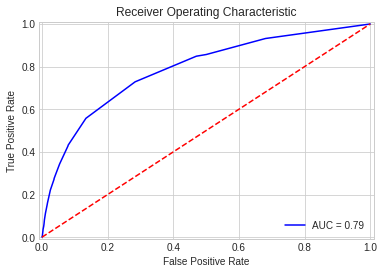

In [36]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=10, 
                             min_samples_leaf=2,
                             min_samples_split=17, 
                             criterion='gini', 
                             max_features=3)
train_pred_rf, test_pred_rf, acc_rf, acc_cv_rf, probs_rf = fit_ml_algo(rfc, 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)

print(metrics.classification_report(y_test, test_pred_rf))

plot_roc_curve(y_test, probs_rf)

Accuracy: 88.85
Accuracy CV 10-Fold: 88.93
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7672
           1       0.56      0.16      0.25       999

    accuracy                           0.89      8671
   macro avg       0.73      0.57      0.59      8671
weighted avg       0.86      0.89      0.86      8671



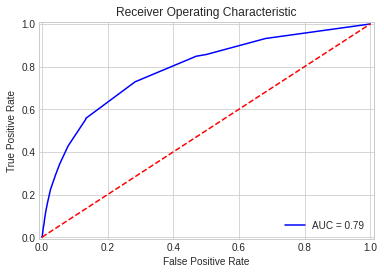

In [37]:
# Gradient Boosting Trees
train_pred_gbt, test_pred_gbt, acc_gbt, acc_cv_gbt, probs_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)

print(metrics.classification_report(y_test, test_pred_gbt))

plot_roc_curve(y_test, probs_gbt)

In [38]:
#Print ranking results
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_knn, 
        acc_log, 
        acc_rf, 
        acc_gaussian, 
        acc_dt,
        acc_gbt
    ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Logistic Regression,88.89
2,Random Forest,88.85
5,Gradient Boosting Trees,88.85
4,Decision Tree,88.84
3,Naive Bayes,88.29
0,KNN,72.91


In [39]:
#Print ranking results on cross-validation
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_cv_knn, 
        acc_cv_log,     
        acc_cv_rf, 
        acc_cv_gaussian, 
        acc_cv_dt,
        acc_cv_gbt
    ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Logistic Regression,88.94
5,Gradient Boosting Trees,88.93
2,Random Forest,88.91
4,Decision Tree,88.91
3,Naive Bayes,88.33
0,KNN,82.11


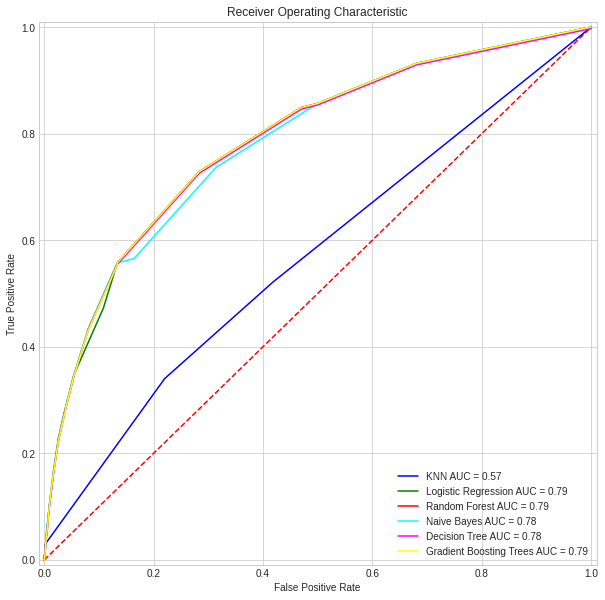

In [40]:
#plot roc-auc curve of each algorithm
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,10)) 

models = [
    'KNN', 
    'Logistic Regression', 
    'Random Forest', 
    'Naive Bayes', 
    'Decision Tree', 
    'Gradient Boosting Trees'
]
probs = [
    probs_knn,
    probs_log,
    probs_rf,
    probs_gau,
    probs_dt,
    probs_gbt
]
colors = [
    'blue',
    'green',
    'red',
    'cyan',
    'magenta',
    'yellow',
]
    
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

def plot_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = metrics.roc_curve(y_test, prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
    plt.legend(loc = 'lower right')
    
for i, model in list(enumerate(models)):
    plot_roc_curves(y_test, probs[i], models[i])
    
plt.show()